Linear Regression RMSE for NJ: 1596074.3607497062
Polynomial Regression RMSE for NJ (degree=3): 305498.322237138


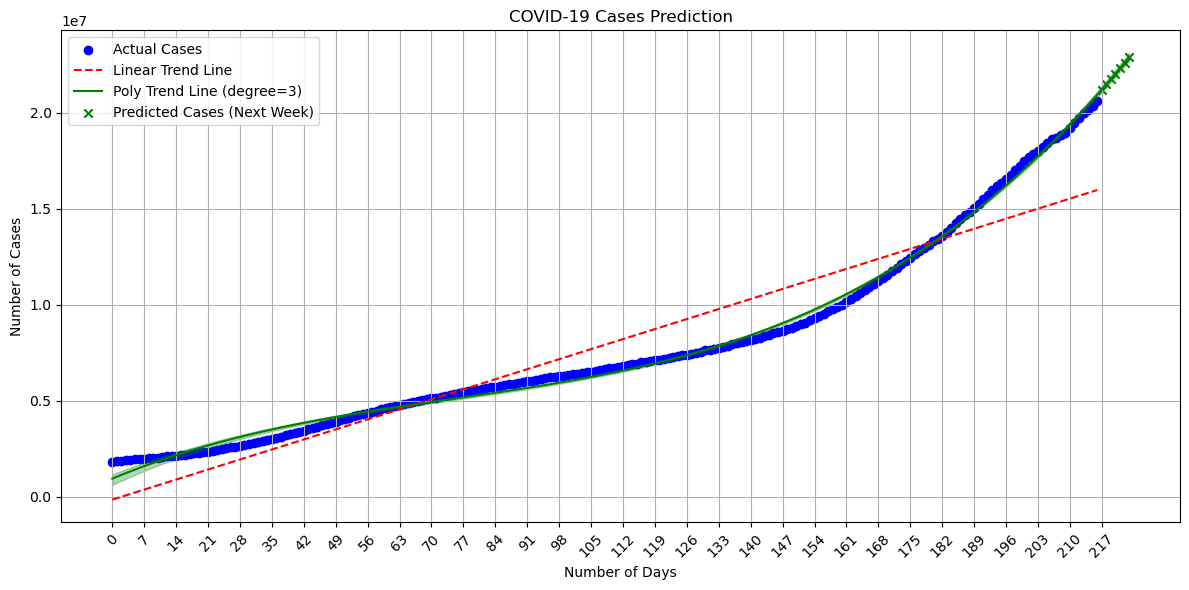

In [88]:
################################################################################################################################
######################################################## TEAM ##################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter data for the specified date range
start_date="2020-06-01"
end_date="2021-01-03"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
# Prepare data for analysis
cases_data=covid_cases_data[date_range].sum(axis=0).values
days_since_start=np.arange(len(date_range)).reshape(-1, 1)
# Fit linear regression model
reg_linear=LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))
# Calculate RMSE for linear regression
linear_predictions=reg_linear.predict(days_since_start)
linear_rmse=np.sqrt(mean_squared_error(cases_data, linear_predictions))
# Fit polynomial regression model
degree=3  # Change this if you want
poly_features=PolynomialFeatures(degree=degree)
X_poly=poly_features.fit_transform(days_since_start)
reg_poly=LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))
# Calculate RMSE for polynomial regression
poly_predictions=reg_poly.predict(X_poly)
poly_rmse=np.sqrt(mean_squared_error(cases_data, poly_predictions))
# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")
# Bootstrap to calculate confidence interval
n_bootstraps=1000
bootstrap_predictions=[]
for _ in range(n_bootstraps):
    indices=np.random.choice(len(cases_data), size=len(cases_data), replace=True)
    X_boot=X_poly[indices]
    y_boot=cases_data[indices]
    reg_boot=LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly=poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
# Calculate confidence interval
confidence_interval=np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)
# Flatten confidence interval arrays
confidence_interval_lower=confidence_interval[0].flatten()
confidence_interval_upper=confidence_interval[1].flatten()
# Plotting
plt.figure(figsize=(12, 6))
# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')
# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')
# Plot polynomial regression trend line and confidence interval
X_plot_poly=poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
plt.plot(np.arange(len(date_range)+7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range)+7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)
# Predictions for the next week
days_future=np.arange(len(date_range), len(date_range)+7).reshape(-1, 1)
X_future_poly=poly_features.transform(days_future)
cases_pred=reg_poly.predict(X_future_poly)
# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')
plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

Linear Regression RMSE for NJ: 13545.924691430659
Polynomial Regression RMSE for NJ (degree=3): 4762.935748761434


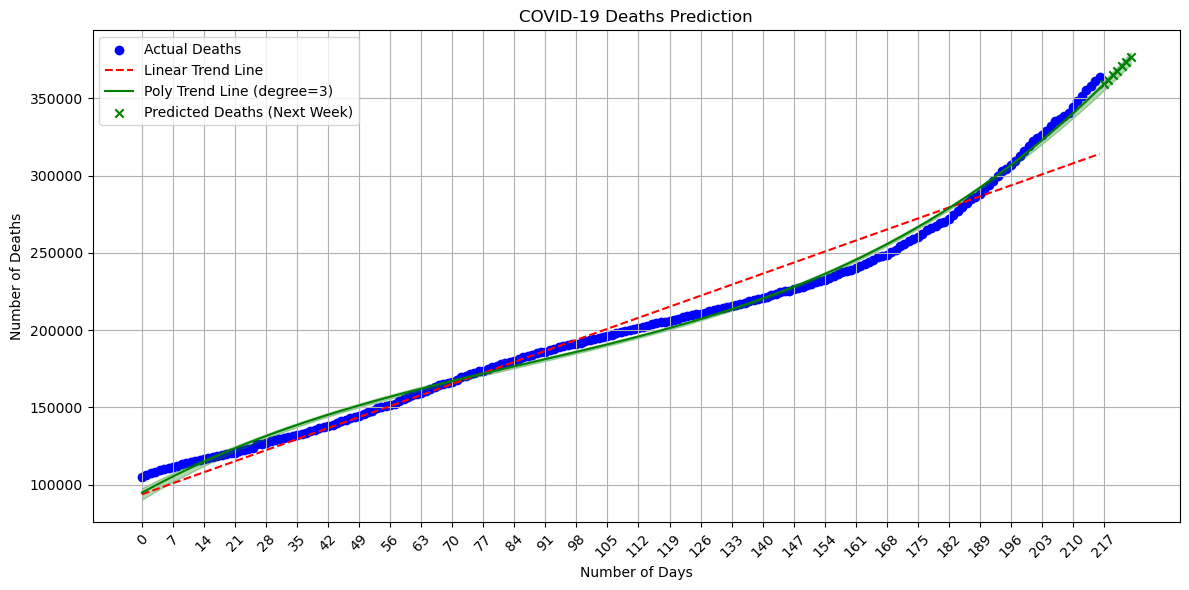

In [89]:
################################################################################################################################
######################################################## TEAM ##################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")
# Filter data for the specified date range
start_date="2020-06-01"
end_date="2021-01-03"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
# Prepare data for analysis
deaths_data=covid_deaths_data[date_range].sum(axis=0).values
days_since_start=np.arange(len(date_range)).reshape(-1, 1)
# Fit linear regression model
reg_linear=LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))
# Calculate RMSE for linear regression
linear_predictions=reg_linear.predict(days_since_start)
linear_rmse=np.sqrt(mean_squared_error(deaths_data, linear_predictions))
# Fit polynomial regression model
degree=3  # Change this if you want
poly_features=PolynomialFeatures(degree=degree)
X_poly=poly_features.fit_transform(days_since_start)
reg_poly=LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))
# Calculate RMSE for polynomial regression
poly_predictions=reg_poly.predict(X_poly)
poly_rmse=np.sqrt(mean_squared_error(deaths_data, poly_predictions))
# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")
# Bootstrap to calculate confidence interval
n_bootstraps=1000
bootstrap_predictions=[]
for _ in range(n_bootstraps):
    indices=np.random.choice(len(deaths_data), size=len(deaths_data), replace=True)
    X_boot=X_poly[indices]
    y_boot=deaths_data[indices]
    reg_boot=LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly=poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
# Calculate confidence interval
confidence_interval=np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)
# Flatten confidence interval arrays
confidence_interval_lower=confidence_interval[0].flatten()
confidence_interval_upper=confidence_interval[1].flatten()
# Plotting
plt.figure(figsize=(12, 6))
# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')
# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')
# Plot polynomial regression trend line and confidence interval
X_plot_poly=poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
plt.plot(np.arange(len(date_range)+7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range)+7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)
# Predictions for the next week
days_future=np.arange(len(date_range), len(date_range)+7).reshape(-1, 1)
X_future_poly=poly_features.transform(days_future)
deaths_pred=reg_poly.predict(X_future_poly)
# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')
plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range)+7, 7), rotation=45)
plt.tight_layout()
plt.show()

TODO: Discuss bias versus variance tradeoff.
      Describe the trends as compared to other countries.

Linear Regression RMSE for NJ: 49034.32916973638
Polynomial Regression RMSE for NJ (degree=3): 6784.317444979545


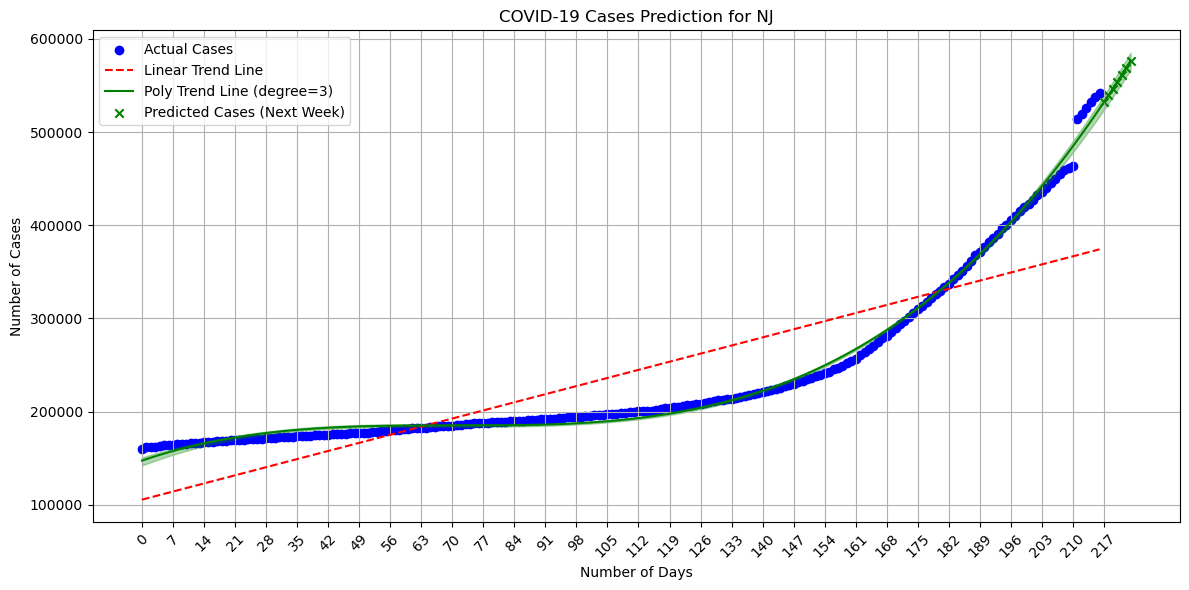

In [90]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter by state
covid_cases_data=covid_cases_data[covid_cases_data['State']=='NJ']
# Filter data for the specified date range
start_date="2020-06-01"
end_date="2021-01-03"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
# Prepare data for analysis
cases_data=covid_cases_data[date_range].sum(axis=0).values
days_since_start=np.arange(len(date_range)).reshape(-1, 1)
# Fit linear regression model
reg_linear=LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))
# Calculate RMSE for linear regression
linear_predictions=reg_linear.predict(days_since_start)
linear_rmse=np.sqrt(mean_squared_error(cases_data, linear_predictions))
# Fit polynomial regression model
degree=3  # Change this if you want
poly_features=PolynomialFeatures(degree=degree)
X_poly=poly_features.fit_transform(days_since_start)
reg_poly=LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))
# Calculate RMSE for polynomial regression
poly_predictions=reg_poly.predict(X_poly)
poly_rmse=np.sqrt(mean_squared_error(cases_data, poly_predictions))
# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")
# Bootstrap to calculate confidence interval
n_bootstraps=1000
bootstrap_predictions=[]
for _ in range(n_bootstraps):
    indices=np.random.choice(len(cases_data), size=len(cases_data), replace=True)
    X_boot=X_poly[indices]
    y_boot=cases_data[indices]
    reg_boot=LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly=poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
# Calculate confidence interval
confidence_interval=np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)
# Flatten confidence interval arrays
confidence_interval_lower=confidence_interval[0].flatten()
confidence_interval_upper=confidence_interval[1].flatten()
# Plotting
plt.figure(figsize=(12, 6))
# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')
# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')
# Plot polynomial regression trend line and confidence interval
X_plot_poly=poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
plt.plot(np.arange(len(date_range)+7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range)+7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)
# Predictions for the next week
days_future=np.arange(len(date_range), len(date_range)+7).reshape(-1, 1)
X_future_poly=poly_features.transform(days_future)
cases_pred=reg_poly.predict(X_future_poly)
# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')
plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range)+7, 7), rotation=45)
plt.tight_layout()
plt.show()

Linear Regression RMSE for NJ: 740.0197842776906
Polynomial Regression RMSE for NJ (degree=3): 276.40750507925344


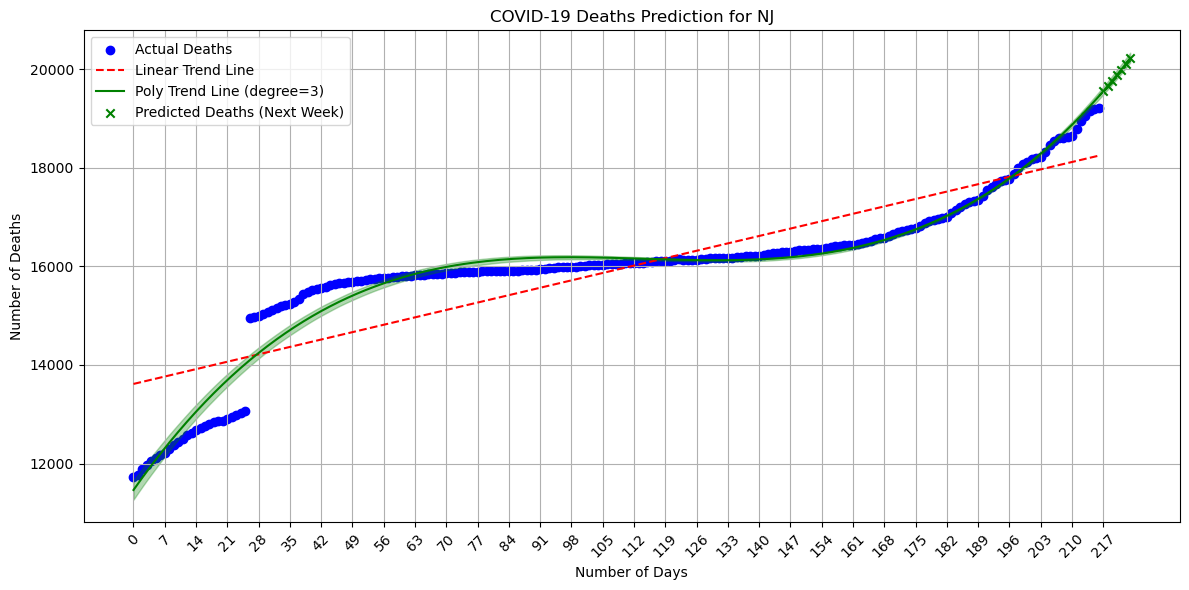

In [91]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter by state
covid_deaths_data=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Filter data for the specified date range
start_date="2020-06-01"
end_date="2021-01-03"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
# Prepare data for analysis
deaths_data=covid_deaths_data[date_range].sum(axis=0).values
days_since_start=np.arange(len(date_range)).reshape(-1, 1)
# Fit linear regression model
reg_linear=LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))
# Calculate RMSE for linear regression
linear_predictions=reg_linear.predict(days_since_start)
linear_rmse=np.sqrt(mean_squared_error(deaths_data, linear_predictions))
# Fit polynomial regression model
degree=3  # Change this if you want
poly_features=PolynomialFeatures(degree=degree)
X_poly=poly_features.fit_transform(days_since_start)
reg_poly=LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))
# Calculate RMSE for polynomial regression
poly_predictions=reg_poly.predict(X_poly)
poly_rmse=np.sqrt(mean_squared_error(deaths_data, poly_predictions))
# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")
# Bootstrap to calculate confidence interval
n_bootstraps=1000
bootstrap_predictions=[]
for _ in range(n_bootstraps):
    indices=np.random.choice(len(deaths_data), size=len(deaths_data), replace=True)
    X_boot=X_poly[indices]
    y_boot=deaths_data[indices]
    reg_boot=LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly=poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
# Calculate confidence interval
confidence_interval=np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)
# Flatten confidence interval arrays
confidence_interval_lower=confidence_interval[0].flatten()
confidence_interval_upper=confidence_interval[1].flatten()
# Plotting
plt.figure(figsize=(12, 6))
# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')
# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')
# Plot polynomial regression trend line and confidence interval
X_plot_poly = poly_features.transform(np.arange(len(date_range)+7).reshape(-1, 1))
plt.plot(np.arange(len(date_range)+7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range)+7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)
# Predictions for the next week
days_future=np.arange(len(date_range), len(date_range)+7).reshape(-1, 1)
X_future_poly=poly_features.transform(days_future)
deaths_pred=reg_poly.predict(X_future_poly)
# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')
plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction for NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range)+7, 7), rotation=45)
plt.tight_layout()
plt.show()

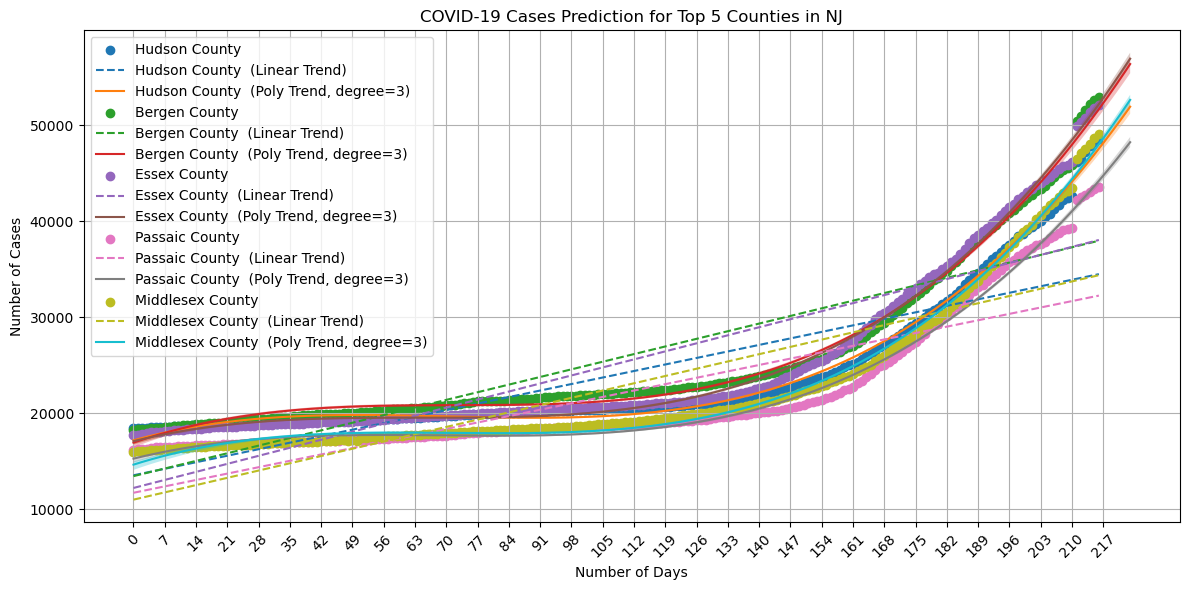

Hudson County  - Linear Regression RMSE: 4247.505070330437, Polynomial Regression RMSE (degree=3): 547.6618463503534
Bergen County  - Linear Regression RMSE: 4427.9679723435975, Polynomial Regression RMSE (degree=3): 674.1516491174718
Essex County  - Linear Regression RMSE: 4715.093368401734, Polynomial Regression RMSE (degree=3): 589.1054174779665
Passaic County  - Linear Regression RMSE: 3932.3576549048994, Polynomial Regression RMSE (degree=3): 633.7142161570376
Middlesex County  - Linear Regression RMSE: 4410.671355414672, Polynomial Regression RMSE (degree=3): 563.2259970331519


In [92]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter data for the state of 'NJ'
covid_cases_data_nj=covid_cases_data[covid_cases_data['State']=='NJ']
# Calculate total cases for each county
county_cases=covid_cases_data_nj.groupby('County Name').sum()
# Sort counties based on total cases
county_cases_sorted=county_cases.sort_values(by='2020-06-01', ascending=False)
# Get the top 5 counties with the most cases
top_5_counties=county_cases_sorted.head(5)
# Select only date columns within the specified range
start_date="2020-06-01"
end_date="2021-01-03"
date_columns=pd.date_range(start=start_date, end=end_date).strftime('%Y-%m-%d')
# Prepare data for analysis
cases_data=top_5_counties[date_columns].values
days_since_start=np.arange(len(date_columns)).reshape(-1, 1)
# Initialize lists to store RMSE values for linear and polynomial regression
linear_rmse_list=[]
poly_rmse_list=[]
# Plotting
plt.figure(figsize=(12, 6))
for county_name, county_cases_data in top_5_counties.iterrows():
    # Fit linear regression model
    reg_linear=LinearRegression().fit(days_since_start, county_cases_data[date_columns].values.reshape(-1, 1))
    linear_predictions=reg_linear.predict(days_since_start)
    linear_rmse=np.sqrt(mean_squared_error(county_cases_data[date_columns].values, linear_predictions))
    linear_rmse_list.append(linear_rmse)
    # Fit polynomial regression model
    degree=3  # Change this if you want
    poly_features=PolynomialFeatures(degree=degree)
    X_poly=poly_features.fit_transform(days_since_start)
    reg_poly=LinearRegression().fit(X_poly, county_cases_data[date_columns].values.reshape(-1, 1))
    poly_predictions=reg_poly.predict(X_poly)
    poly_rmse=np.sqrt(mean_squared_error(county_cases_data[date_columns].values, poly_predictions))
    poly_rmse_list.append(poly_rmse)
    # Bootstrap to calculate confidence interval
    n_bootstraps=1000
    bootstrap_predictions=[]
    for _ in range(n_bootstraps):
        indices=np.random.choice(len(county_cases_data[date_columns]), size=len(county_cases_data[date_columns]), replace=True)
        X_boot=X_poly[indices]
        y_boot=county_cases_data[date_columns].values[indices]
        reg_boot=LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
        X_plot_poly=poly_features.transform(np.arange(len(date_columns)+7).reshape(-1, 1))
        bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    # Calculate confidence interval
    confidence_interval=np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)
    # Flatten confidence interval arrays
    confidence_interval_lower=confidence_interval[0].flatten()
    confidence_interval_upper=confidence_interval[1].flatten()
    # Plot actual data
    plt.scatter(days_since_start, county_cases_data[date_columns].values, label=county_name)
    # Plot linear regression trend line
    plt.plot(days_since_start, reg_linear.predict(days_since_start), linestyle='--', label=f'{county_name} (Linear Trend)')
    # Plot polynomial regression trend line and confidence interval
    X_plot_poly=poly_features.transform(np.arange(len(date_columns)+7).reshape(-1, 1))
    plt.plot(np.arange(len(date_columns)+7), reg_poly.predict(X_plot_poly), label=f'{county_name} (Poly Trend, degree={degree})')
    plt.fill_between(np.arange(len(date_columns)+7), confidence_interval_lower, confidence_interval_upper, alpha=0.3)
plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for Top 5 Counties in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_columns)+7, 7), rotation=45)
plt.tight_layout()
plt.show()
# Print RMSE values
for i, county_name in enumerate(top_5_counties.index):
    print(f"{county_name} - Linear Regression RMSE: {linear_rmse_list[i]}, Polynomial Regression RMSE (degree={degree}): {poly_rmse_list[i]}")

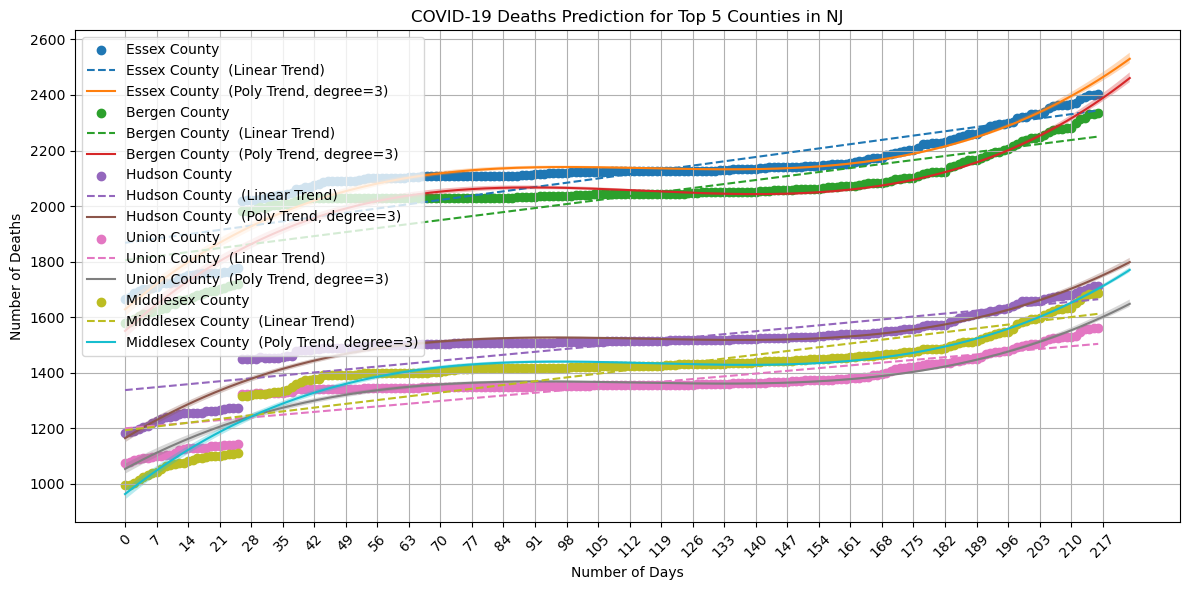

Essex County  - Linear Regression RMSE: 82.0576775779843, Polynomial Regression RMSE (degree=3): 35.610988227344784
Bergen County  - Linear Regression RMSE: 89.79217725692268, Polynomial Regression RMSE (degree=3): 41.33809942061052
Hudson County  - Linear Regression RMSE: 58.85964698328766, Polynomial Regression RMSE (degree=3): 24.85555418632604
Union County  - Linear Regression RMSE: 54.44899623789124, Polynomial Regression RMSE (degree=3): 26.447981494489888
Middlesex County  - Linear Regression RMSE: 75.4623243471779, Polynomial Regression RMSE (degree=3): 28.83040526630238


In [93]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter data for the state of 'NJ'
covid_deaths_data_nj=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Calculate total deaths for each county
county_deaths=covid_deaths_data_nj.groupby('County Name').sum()
# Sort counties based on total deaths
county_deaths_sorted=county_deaths.sort_values(by='2020-06-01', ascending=False)
# Get the top 5 counties with the most deaths
top_5_counties=county_deaths_sorted.head(5)
# Select only date columns within the specified range
start_date="2020-06-01"
end_date="2021-01-03"
date_columns=pd.date_range(start=start_date, end=end_date).strftime('%Y-%m-%d')
# Prepare data for analysis
deaths_data=top_5_counties[date_columns].values
days_since_start=np.arange(len(date_columns)).reshape(-1, 1)
# Initialize lists to store RMSE values for linear and polynomial regression
linear_rmse_list=[]
poly_rmse_list=[]
# Plotting
plt.figure(figsize=(12, 6))
for county_name, county_deaths_data in top_5_counties.iterrows():
    # Fit linear regression model
    reg_linear=LinearRegression().fit(days_since_start, county_deaths_data[date_columns].values.reshape(-1, 1))
    linear_predictions=reg_linear.predict(days_since_start)
    linear_rmse=np.sqrt(mean_squared_error(county_deaths_data[date_columns].values, linear_predictions))
    linear_rmse_list.append(linear_rmse)
    # Fit polynomial regression model
    degree=3  # Change this if you want
    poly_features=PolynomialFeatures(degree=degree)
    X_poly=poly_features.fit_transform(days_since_start)
    reg_poly=LinearRegression().fit(X_poly, county_deaths_data[date_columns].values.reshape(-1, 1))
    poly_predictions=reg_poly.predict(X_poly)
    poly_rmse=np.sqrt(mean_squared_error(county_deaths_data[date_columns].values, poly_predictions))
    poly_rmse_list.append(poly_rmse)
    # Bootstrap to calculate confidence interval
    n_bootstraps=1000
    bootstrap_predictions=[]
    for _ in range(n_bootstraps):
        indices=np.random.choice(len(county_deaths_data[date_columns]), size=len(county_deaths_data[date_columns]), replace=True)
        X_boot=X_poly[indices]
        y_boot=county_deaths_data[date_columns].values[indices]
        reg_boot=LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
        X_plot_poly=poly_features.transform(np.arange(len(date_columns)+7).reshape(-1, 1))
        bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    # Calculate confidence interval
    confidence_interval=np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)
    # Flatten confidence interval arrays
    confidence_interval_lower=confidence_interval[0].flatten()
    confidence_interval_upper=confidence_interval[1].flatten()
    # Plot actual data
    plt.scatter(days_since_start, county_deaths_data[date_columns].values, label=county_name)
    # Plot linear regression trend line
    plt.plot(days_since_start, reg_linear.predict(days_since_start), linestyle='--', label=f'{county_name} (Linear Trend)')
    # Plot polynomial regression trend line and confidence interval
    X_plot_poly=poly_features.transform(np.arange(len(date_columns)+7).reshape(-1, 1))
    plt.plot(np.arange(len(date_columns)+7), reg_poly.predict(X_plot_poly), label=f'{county_name} (Poly Trend, degree={degree})')
    plt.fill_between(np.arange(len(date_columns)+7), confidence_interval_lower, confidence_interval_upper, alpha=0.3)
plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction for Top 5 Counties in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_columns)+7, 7), rotation=45)
plt.tight_layout()
plt.show()
# Print RMSE values
for i, county_name in enumerate(top_5_counties.index):
    print(f"{county_name} - Linear Regression RMSE: {linear_rmse_list[i]}, Polynomial Regression RMSE (degree={degree}): {poly_rmse_list[i]}")

In [94]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd 

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
read_file=pd.read_excel("allhlcn231.xlsx")
read_file.to_csv("enrichment.csv", index=None, header=True)
data=pd.read_csv("enrichment.csv", dtype=dtype)
df=pd.DataFrame(data)
df.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,11841874,150223138,151012227,151528335,2874415473594,1465,1.0,1.0
1,US000,US,0.0,1,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,60721,2865577,2879371,2883686,69924124474,1870,1.0,1.0
2,US000,US,0.0,2,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,71769,4523955,4614397,4634781,87122334855,1460,1.0,1.0
3,US000,US,0.0,3,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,171738,14256931,14378197,14442084,222917538523,1194,1.0,1.0
4,US000,US,0.0,5,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,11537646,128576675,129140262,129567784,2494451475742,1486,1.0,1.0


In [95]:
###### ENRICHMENT ONLY HAS EMPLOYMENT DATA FOR JAN, FEB, MARCH OF 2023 SO WE WILL FILTER THE CASES DATA FOR THIS TIMEFRAME #####
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter by state
covid_cases_data=covid_cases_data[covid_cases_data['State']=='NJ']
# Filter data for the specified date range
start_date="2023-01-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_cases_data['countyFIPS']=covid_cases_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_cases_data_df=pd.merge(enrichment, covid_cases_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
nj_cases_data_df.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,2023-03-22,2023-03-23,2023-03-24,2023-03-25,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31
0,34001,34,1.0,0,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
1,34001,34,1.0,1,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
2,34001,34,1.0,2,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
3,34001,34,1.0,3,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
4,34001,34,1.0,5,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852


In [96]:
###### ENRICHMENT ONLY HAS EMPLOYMENT DATA FOR JAN, FEB, MARCH OF 2023 SO WE WILL FILTER THE CASES DATA FOR THIS TIMEFRAME #####
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter by state
covid_deaths_data=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Filter data for the specified date range
start_date="2023-01-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_deaths_data['countyFIPS']=covid_deaths_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_deaths_data_df=pd.merge(enrichment, covid_deaths_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
nj_deaths_data_df.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,2023-03-22,2023-03-23,2023-03-24,2023-03-25,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31
0,34001,34,1.0,0,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
1,34001,34,1.0,1,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
2,34001,34,1.0,2,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
3,34001,34,1.0,3,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
4,34001,34,1.0,5,10,2023,1,County,New Jersey,"Atlantic County, New Jersey",...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073


<h1>Hypothesis 1 (question from pt.3)<h1>

In [97]:
##################################################### FOR JANUARY ##############################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter by state
covid_cases_data=covid_cases_data[covid_cases_data['State']=='NJ']
# Filter data for the specified date range
# For just January
start_date="2023-01-01"
end_date="2023-01-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_cases_data['countyFIPS']=covid_cases_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_cases_data_df=pd.merge(enrichment, covid_cases_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 case groups
median_cases=nj_cases_data_df[date_range].median(axis=1)
nj_cases_data_df['High_Covid_Cases']=np.where(median_cases>=median_cases.median(), 1, 0)
# Perform two-sample t-test
high_employment=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==1]['January Employment']
low_employment=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==0]['January Employment']
t_statistic, p_value=ttest_ind(high_employment, low_employment)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_employment, low_employment, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher employment leads to higher COVID-19 cases):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 5.2141962402591675
P-value: 3.0541454921263176e-07

One-tail two-sample t-test results (Higher employment leads to higher COVID-19 cases):
T-statistic: 5.2141962402591675
P-value: 1.5270727460631588e-07


In [98]:
#################################################### FOR FEBRUARY ##############################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter by state
covid_cases_data=covid_cases_data[covid_cases_data['State']=='NJ']
# Filter data for the specified date range
# For just February
start_date="2023-02-01"
end_date="2023-02-28"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_cases_data['countyFIPS']=covid_cases_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_cases_data_df=pd.merge(enrichment, covid_cases_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 case groups
median_cases=nj_cases_data_df[date_range].median(axis=1)
nj_cases_data_df['High_Covid_Cases']=np.where(median_cases>=median_cases.median(), 1, 0)
# Perform two-sample t-test
high_employment=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==1]['February Employment']
low_employment=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==0]['February Employment']
t_statistic, p_value=ttest_ind(high_employment, low_employment)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_employment, low_employment, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher employment leads to higher COVID-19 cases):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 5.215236380726733
P-value: 3.038208694122596e-07

One-tail two-sample t-test results (Higher employment leads to higher COVID-19 cases):
T-statistic: 5.215236380726733
P-value: 1.519104347061298e-07


In [99]:
###################################################### FOR MARCH ###############################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter by state
covid_cases_data=covid_cases_data[covid_cases_data['State']=='NJ']
# Filter data for the specified date range
# For just January
start_date="2023-03-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_cases_data['countyFIPS']=covid_cases_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_cases_data_df=pd.merge(enrichment, covid_cases_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 case groups
median_cases=nj_cases_data_df[date_range].median(axis=1)
nj_cases_data_df['High_Covid_Cases']=np.where(median_cases>=median_cases.median(), 1, 0)
# Perform two-sample t-test
high_employment=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==1]['March Employment']
low_employment=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==0]['March Employment']
t_statistic, p_value=ttest_ind(high_employment, low_employment)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_employment, low_employment, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher employment leads to higher COVID-19 cases):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 5.217828217000192
P-value: 2.9988470823473013e-07

One-tail two-sample t-test results (Higher employment leads to higher COVID-19 cases):
T-statistic: 5.217828217000192
P-value: 1.4994235411736506e-07


I hypothesize that higher employment data (overall employment numbers) leads to higher covid case numbers or more rapid increase in covid cases
The two tail sample test examines whether there is a significant difference in monthly (jan, feb, march) employment levels between areas with high COVID-19 cases and areas with low COVID-19 cases. Because the p-values are so low (3.054x10^-7), (3.038x10^-7), and (2.999x10^-7), the null  hypothesis of equal means is to be rejected. This indicates a significant difference in employment levels between the two groups.
The one tail two sample t-test, which indicates if higher employment leads to higher COVID-19 cases, also exhibits low p-values such as (1.53x10^-7), (1.52x10^-7), and (1.50x10^-7), which suggests that we should reject the null hypothesis in favor of the alternative, indicating that higher employment is indeed associated with higher COVID-19 cases.
The results of these tests suggest a strong relationship between employment levels and COVID-19 cases, with higher employment correlating with higher COVID-19 cases.

TODO: Make 2 new hypotheses and do hypothesis tests on them. Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing.

<h1>Hypothesis 2 (question from pt.3)<h1>

In [100]:
############################################### FOR TOTAL QUARTERLY WAGES ######################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter by state
covid_cases_data=covid_cases_data[covid_cases_data['State']=='NJ']
# Filter data for the specified date range
start_date="2023-01-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_cases_data['countyFIPS']=covid_cases_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_cases_data_df=pd.merge(enrichment, covid_cases_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 case groups
median_cases=nj_cases_data_df[date_range].median(axis=1)
nj_cases_data_df['High_Covid_Cases']=np.where(median_cases>=median_cases.median(), 1, 0)
# Perform two-sample t-test
high_quarterly_wages=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==1]['Total Quarterly Wages']
low_quarterly_wages=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==0]['Total Quarterly Wages']
t_statistic, p_value=ttest_ind(high_quarterly_wages, low_quarterly_wages)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_quarterly_wages, low_quarterly_wages, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher quarterly wages leads to higher COVID-19 cases):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 4.772272233230051
P-value: 2.6121380544612295e-06

One-tail two-sample t-test results (Higher quarterly wages leads to higher COVID-19 cases):
T-statistic: 4.772272233230051
P-value: 1.3060690272306147e-06


I hypothesize that higher total quarterly wages will lead to lower covid cases and a less rapid increase in covid cases in areas with high total quarterly wages. The two sample t-test measures the difference between the means of the two groups relative to the variation within the groups. In this case, a higher positive value indicates that the average total quarterly wages for counties with high COVID-19 cases are significantly higher than those for counties with low COVID-19 cases. The extremely low p-value suggests strong evidence against the null hypothesis, indicating that the observed difference in total quarterly wages between the two groups is unlikely to have occurred by chance. The one tail test specifically examines whether higher quarterly wages lead to higher COVID-19 cases. The t-statistics were the same in both groups, indicating the same magnitude of difference between the groups. The p-value, however, is halved compared to the two-tailed test, as it is now considering only one direction of the distribution. This further strengthens the evidence against the null hypothesis and suggests that counties with higher quarterly wages are more likely to have higher COVID-19 cases. Both tests provide strong evidence to reject the null hypothesis, indicating a significant relationship between total quarterly wages and COVID-19 cases, with higher wages potentially leading to higher case counts.

<h1>Hypothesis 3 (question from pt.3)<h1>

In [101]:
##################################### FOR EMPLOYMENT LOCATION QUOTIENT RELATIVE TO US ##########################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 cases data
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
# Filter by state
covid_cases_data=covid_cases_data[covid_cases_data['State']=='NJ']
# Filter data for the specified date range
start_date="2023-01-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data=covid_cases_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_cases_data['countyFIPS']=covid_cases_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_cases_data_df=pd.merge(enrichment, covid_cases_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 case groups
median_cases=nj_cases_data_df[date_range].median(axis=1)
nj_cases_data_df['High_Covid_Cases']=np.where(median_cases>=median_cases.median(), 1, 0)
# Perform two-sample t-test
high_employment_quotient=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==1]['Employment Location Quotient Relative to U.S.']
low_employment_quotient=nj_cases_data_df[nj_cases_data_df['High_Covid_Cases']==0]['Employment Location Quotient Relative to U.S.']
t_statistic, p_value=ttest_ind(high_employment_quotient, low_employment_quotient)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_employment_quotient, low_employment_quotient, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher employment location quotient relative to U.S. leads to higher COVID-19 cases):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: -1.0210430763532274
P-value: 0.3078905222794478

One-tail two-sample t-test results (Higher employment location quotient relative to U.S. leads to higher COVID-19 cases):
T-statistic: -1.0210430763532274
P-value: 0.8460547388602762


I hypothesize that areas with a higher employment location quotient relative to the US will experience higher covid cases and a more rapid increase in covid cases. In the two sample t-test, the negative t statistic indicates that the average employment location quotient relative to the U.S. for counties with high COVID-19 cases is lower than that for counties with low COVID-19 cases. However, the p-value is relatively high (0.308), indicating weak evidence against the null hypothesis. This suggests that the observed difference in employment location quotient between the two groups may have occurred by chance. For the one-tail test, we are examining whether a higher employment location quotient relative to the U.S. leads to higher COVID-19 cases. The t-statistic remains the same, indicating the same magnitude of difference between the groups. The p-value is even higher compared to the two-tailed test (0.846), suggesting even weaker evidence against the null hypothesis. This implies that there is no strong indication that higher employment location quotients lead to higher COVID-19 cases. Both of the tests suggest weak evidence against the hypothesis that a higher employment location quotient relative to the U.S. leads to higher COVID-19 cases. The results indicate that there may not be a significant relationship between the employment location quotient and COVID-19 cases in the studied counties.

<h1>Hypothesis 4 (new)<h1>

In [102]:
##################################################### FOR JANUARY ##############################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter by state
covid_deaths_data=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Filter data for the specified date range
# For just January
start_date="2023-01-01"
end_date="2023-01-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_deaths_data['countyFIPS']=covid_deaths_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_deaths_data_df=pd.merge(enrichment, covid_deaths_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 death groups
median_deaths=nj_deaths_data_df[date_range].median(axis=1)
nj_deaths_data_df['High_Covid_Deaths']=np.where(median_deaths>=median_deaths.median(), 1, 0)
# Perform two-sample t-test
high_employment=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==1]['January Employment']
low_employment=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==0]['January Employment']
t_statistic, p_value=ttest_ind(high_employment, low_employment)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_employment, low_employment, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher employment leads to higher COVID-19 deaths):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 5.2141962402591675
P-value: 3.0541454921263176e-07

One-tail two-sample t-test results (Higher employment leads to higher COVID-19 deaths):
T-statistic: 5.2141962402591675
P-value: 1.5270727460631588e-07


In [103]:
#################################################### FOR FEBRUARY ##############################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter by state
covid_deaths_data=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Filter data for the specified date range
# For just February
start_date="2023-02-01"
end_date="2023-02-28"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_deaths_data['countyFIPS']=covid_deaths_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_deaths_data_df=pd.merge(enrichment, covid_deaths_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 death groups
median_deaths=nj_deaths_data_df[date_range].median(axis=1)
nj_deaths_data_df['High_Covid_Deaths']=np.where(median_deaths>=median_deaths.median(), 1, 0)
# Perform two-sample t-test
high_employment=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==1]['February Employment']
low_employment=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==0]['February Employment']
t_statistic, p_value=ttest_ind(high_employment, low_employment)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_employment, low_employment, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher employment leads to higher COVID-19 deaths):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 5.215236380726733
P-value: 3.038208694122596e-07

One-tail two-sample t-test results (Higher employment leads to higher COVID-19 deaths):
T-statistic: 5.215236380726733
P-value: 1.519104347061298e-07


In [104]:
##################################################### FOR MARCH ###############################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter by state
covid_deaths_data=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Filter data for the specified date range
# For just March
start_date="2023-03-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_deaths_data['countyFIPS']=covid_deaths_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_deaths_data_df=pd.merge(enrichment, covid_deaths_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 death groups
median_deaths=nj_deaths_data_df[date_range].median(axis=1)
nj_deaths_data_df['High_Covid_Deaths']=np.where(median_deaths>=median_deaths.median(), 1, 0)
# Perform two-sample t-test
high_employment=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==1]['March Employment']
low_employment=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==0]['March Employment']
t_statistic, p_value=ttest_ind(high_employment, low_employment)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_employment, low_employment, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher employment leads to higher COVID-19 deaths):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 5.217828217000192
P-value: 2.9988470823473013e-07

One-tail two-sample t-test results (Higher employment leads to higher COVID-19 deaths):
T-statistic: 5.217828217000192
P-value: 1.4994235411736506e-07


I hypothesize that higher employment data (overall employment numbers) leads to higher covid death numbers or more rapid increase in covid deaths
The two tail sample test examines whether there is a significant difference in monthly (jan, feb, march) employment levels between areas with high COVID-19 deaths and areas with low COVID-19 deaths. Because the p-values are so low (3.05x10^-7), (3.04x10^-7), and (2.999x10^-7), the null  hypothesis of equal means is to be rejected. This indicates a significant difference in employment levels between the two groups.
The one tail two sample t-test, which indicates if higher employment leads to higher COVID-19 deaths, also exhibits low p-values such as (1.53x10^-7), (1.52x10^-7), and (1.50x10^-7), which suggests that we should reject the null hypothesis in favor of the alternative, indicating that higher employment is indeed associated with higher COVID-19 deaths.
The results of these tests suggest a strong relationship between employment levels and COVID-19 deaths, with higher employment correlating with higher COVID-19 deaths.

<h1>Hypothesis 5 (new)<h1>

In [105]:
#################################### FOR TOTAL WAGE LOCATION QUOTIENT RELATIVE TO U.S. #########################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter by state
covid_deaths_data=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Filter data for the specified date range
start_date="2023-01-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_deaths_data['countyFIPS']=covid_deaths_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_deaths_data_df=pd.merge(enrichment, covid_deaths_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 death groups
median_deaths=nj_deaths_data_df[date_range].median(axis=1)
nj_deaths_data_df['High_Covid_Deaths']=np.where(median_deaths>=median_deaths.median(), 1, 0)
# Perform two-sample t-test
high_wage_location_quotient=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==1]['Total Wage Location Quotient Relative to U.S.']
low_wage_location_quotient=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==0]['Total Wage Location Quotient Relative to U.S.']
t_statistic, p_value=ttest_ind(high_wage_location_quotient, low_wage_location_quotient)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_wage_location_quotient, low_wage_location_quotient, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher total wage location quotient relative to U.S. leads to higher COVID-19 deaths):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: -1.6082058342504642
P-value: 0.10862941764546483

One-tail two-sample t-test results (Higher total wage location quotient relative to U.S. leads to higher COVID-19 deaths):
T-statistic: -1.6082058342504642
P-value: 0.9456852911772675


I hypothesize that areas with a higher total total wage location quotient relative to the U.S. leads to higher COVID-19 deaths and a more rapid increase in COVID-19 deaths. The two tail  t-statistic measures the difference between the means of the two groups relative to the variation within the groups. In this case, a negative t-statistic suggests that the average total wage location quotient relative to the U.S. for counties with high COVID-19 deaths is lower than that for counties with low COVID-19 deaths. However, the p-value is relatively high (0.109), indicating weak evidence against the null hypothesis. This suggests that the observed difference in wage location quotient between the two groups may have occurred by chance. In the one tail two sample t-test, we are examining whether a higher total wage location quotient relative to the U.S. leads to higher COVID-19 deaths. The t-statistic remains the same, indicating the same magnitude of difference between the groups. The p-value is higher compared to the two-tailed test (0.946), suggesting even weaker evidence against the null hypothesis. This implies that there is no strong indication that higher wage location quotients lead to higher COVID-19 deaths. Both of these tests provide weak evidence against the hypothesis that a higher total wage location quotient relative to the U.S. leads to higher COVID-19 deaths. From the results observed, we can conclude that there may not be a significant relationship between the wage location quotient and COVID-19 deaths in the analyzed counties.

<h1>Hypothesis 6 (new)<h1>

In [106]:
############################################### FOR ESTABLISHMENT COUNT ########################################################
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

dtype={'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}
# Read the COVID-19 deaths data
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
# Filter by state
covid_deaths_data=covid_deaths_data[covid_deaths_data['State']=='NJ']
# Filter data for the specified date range
start_date="2023-01-01"
end_date="2023-03-31"
date_range=pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data=covid_deaths_data[['countyFIPS', 'County Name', 'State']+date_range]
covid_deaths_data['countyFIPS']=covid_deaths_data['countyFIPS'].astype(str)
enrichment=pd.read_csv('enrichment.csv', dtype=dtype)
# Creating the merged data frame
nj_deaths_data_df=pd.merge(enrichment, covid_deaths_data, left_on='Area\nCode', right_on='countyFIPS', how='inner')
# Define higher and lower COVID-19 death groups
median_deaths=nj_deaths_data_df[date_range].median(axis=1)
nj_deaths_data_df['High_Covid_Deaths']=np.where(median_deaths>=median_deaths.median(), 1, 0)
# Perform two-sample t-test
high_establishment_count=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==1]['Establishment Count']
low_establishment_count=nj_deaths_data_df[nj_deaths_data_df['High_Covid_Deaths']==0]['Establishment Count']
t_statistic, p_value=ttest_ind(high_establishment_count, low_establishment_count)
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Perform one-tail two-sample t-test
t_statistic_one_tail, p_value_one_tail=ttest_ind(high_establishment_count, low_establishment_count, alternative='greater')
print("\nOne-tail two-sample t-test results (Higher establishment count leads to higher COVID-19 deaths):")
print("T-statistic:", t_statistic_one_tail)
print("P-value:", p_value_one_tail)

Two-sample t-test results:
T-statistic: 5.599856045350376
P-value: 4.147075950202501e-08

One-tail two-sample t-test results (Higher establishment count leads to higher COVID-19 deaths):
T-statistic: 5.599856045350376
P-value: 2.0735379751012507e-08


I hypothesize that areas with a higher establishment count will experience higher COVID-19 deaths and a more rapid increase in COVID-19 deaths. The result of the two tail p-value test being low (4.15x10^-8) indicates that there is a significant difference in establishment counts between counties with high and low COVID-19 deaths. The results suggest that this difference is unlikely to be due to random chance. For the one tail two sample p-value test, the low p-value of (2.07x10^-8) suggest that there is strong evidence to reject the null hypothesis in favor of the alternative hypothesis, indicating that higher establishment counts indeed lead to higher COVID-19 deaths.